In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn import metrics

import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/moral_appeal_dataset.csv')
df

,ad,moral_appeal
0,psd jobs spring launch webinar monday pmpm vir...,0
1,the aflcio has always fought alongside workers...,1
2,your national monuments are on the chopping block,0
3,join us for a focus group to share your though...,0
4,with president trump nominating a judge with a...,1
...,...,...
19729,what is senator heidi heitkamp hiding watch be...,0
19730,breaking the washington post just reported on ...,0
19731,protecting vermont is injured employees contac...,1
19732,according to the huffington post days after pa...,0


In [3]:
# vectorize testing and training data 
X_train, X_test, y_train, y_test= train_test_split(df['ad'], df['moral_appeal'] , test_size = 0.2, random_state = 0)

In [4]:
# Use term frequency to represent documents
tf_vectorizer = TfidfVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
clf =RandomForestClassifier(n_estimators=100)
clf.fit(X_train_tf, y_train)

RandomForestClassifier()

accuracy:   0.978
                 precision    recall  f1-score   support

no moral appeal       0.97      0.98      0.98      1934
   moral appeal       0.98      0.98      0.98      2013

       accuracy                           0.98      3947
      macro avg       0.98      0.98      0.98      3947
   weighted avg       0.98      0.98      0.98      3947

confusion matrix:
[[1897   37]
 [  50 1963]]



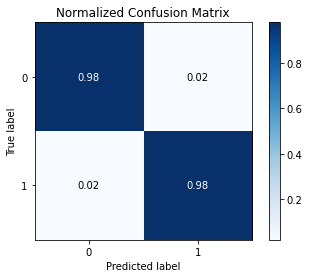

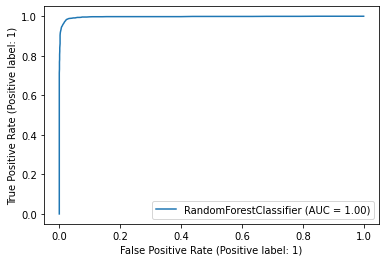

In [6]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no moral appeal', 'moral appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_moral_appeal.csv').rename(columns = {'moral': 'moral_appeal' })
df_val

,ad,moral_appeal
0,yearold danylo is not only battling cancer but...,1
1,learn how to use the new staffing law to impro...,0
2,we are live with climate activist anuna de wev...,0
3,did you miss the t summit relive the daylong e...,0
4,friday is north carolina’s online voter regist...,0
...,...,...
195,YOU can make a difference this year. Donate NO...,1
196,Dear readers.\nRussian Nazis do not stop exter...,1
197,"Education risks becoming the greatest divider,...",1
198,Shelling killed her mother.\nWithout an urgent...,1


accuracy:   0.705
                 precision    recall  f1-score   support

no moral appeal       0.96      0.44      0.60       101
   moral appeal       0.63      0.98      0.77        99

       accuracy                           0.70       200
      macro avg       0.79      0.71      0.68       200
   weighted avg       0.79      0.70      0.68       200

confusion matrix:
[[44 57]
 [ 2 97]]



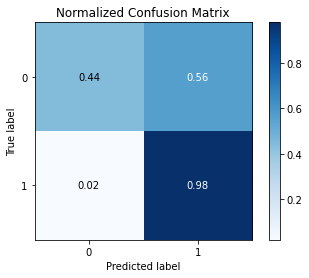

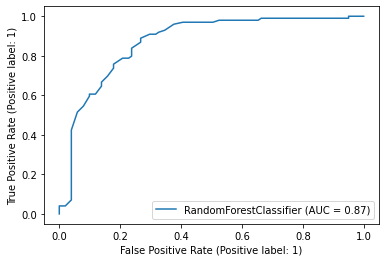

In [8]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['moral_appeal']

y_pred = clf.predict(X_val)

# compute the performance measures
score = metrics.accuracy_score(y_pred, y_val)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['no moral appeal', 'moral appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
print()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)